## Analysis of Startups and Investors

#### Team 12 : Sai Chowdary Gullapally, Yimeng Wang

References : 
We have used examples provided on stack overflow, plotly to understand and modify them as we require for visualization and plots etc.

### __Introduction__:
Recent years have seen an upsurge in the number of startups established. While many of the startups are thirsty for funding on one hand, on the other hand venture capitalists are keenly judging and weighing their options  so that they can extract as much profit as they can through the investment. So in this project we would like to analyze patterns that prove beneficial to both startups and investors. __More particularly we would like to answer a few questions that an entrepreneur would ask himself when he is about to start a company__ 
for example is there any particular time of the year that is better suited for starting a company?
<br>We feel  it would be beneficial to see the trends of startups by looking at which countries are good at present for attracting investments, which country might be better in the future, which countries retain their local investors, which countries attract foreign investors, are htere any patterns investors follow so that we can match a pair of investor and startup together or othe questions like what would be a good time to take funding, does total funding effect the success rate? Do number of funding rounds affect success rate? 

### Novelty and Importance/Relevance of the topic:
As far as we know we did not see any such analysis readily available on this topic which was one of the main reasons why we chose this as we believe it is a very important question although definitely not comprehensive our data itself __66368 companies, 168647 investments which amount to  2.2301312679891195 Trillion USD and are contributed by 30190 investors__ These staggering numbers show the enormous scale of importance and the potential value of this analysis. As more and more peopleare taking steps towardsentrepreneurshipp and andmore and more startups are opening up due to new technologies this becomes very relavent in today's world.

### __Data set__:  
We use the data from the following https://github.com/notpeter/crunchbase-data <br>
We use the __'companies.csv'__ and __'investments.csv'__ files from the repository, they contain data of startups ans investments, we then do data pre-processing as explained below and then use it for our analysis

__Data Desription__:The following is a brief description of the dataset, we will explain each variable in better detail as and when we use it.

- __companies.csv__: This file has tabular form. It has 66368 rows, each row corresponds to a particular startup and has the following 14  columns/features:
    - __permalink__          :permalink of the company
    - __name__: Name of the company 
    - __homepageurl__: Hyperlink of the company’s website 
    - __category_list__: The list of categories like software biotechnology etc in which the company is performing its business
    - __funding_total_usd__: Total funding received by the company from inception in USD
    - __status__: Is the company still operating or not, 4 distinct categories(explained later)
    - __country_code__: Code of the country where the startup is located
    - __state_code__: Code of the state where the startup is located
    - __region__: Name of the region where the startup is located
    - __city__: Name of the city where the startup is located
    - __funding_rounds__: Number of funding rounds obtained
    - __founded_at__: Founding date of the company
    - __first_funding_at__: The date in string format (YYYY-MM-DD) it received its first funding
    - __last_funding_at__: The date in string format (YYYY-MM-DD) it received its latest funding

- __investments.csv__: This is also Tabular with 168647 rows and each row has 18 columns/features corresponding to an investment.The columns are:
    - __company_permalink__ :permalink of the company
    - __company_name__ : Name of the company 
    - __company_category_list__ :The list of categories like software biotechnology etc in which the company is performing its business
    - __company_country_code__: Code of the country where the startup is located
    - __company_state_code__ :Code of the state where the startup is located
    - __company_region__ :Region where the startup is located
    - __company_city__ :Name of the city where the startup is located
    - __investor_permalink__ :permalink of the investor
    - __investor_name__ :Name of the investor
    - __investor_country_code__ :Code of the country where the investor is located
    - __investor_state_code__:Code of the state where the investor is located
    - __investor_region__ :Region where the investor is located
    - __investor_city__ :Name of the city where the investor is located
    - __funding_round_permalink__ : permalink of funding round
    - __funding_round_type__: Type of funding round (seed,venture etc)
    - __funding_round_code__ :Code of the round (if the type is venture then we can have A,B,C etc)
    - __funded_at__      : Date in string format (YYYY-MM-DD)of the funding
    - __raised_amt_usd__: Amount of funding in USD

### Pre-processing:

__1.Removing Null entries__: This is done individually as per each of the sub task we focus on,even though it would be lot simpler to just remove them at the beginning we felt it is better to remove specifically/separately for each task as and when needed because if we remove at the beginnig at self then we might loose a lot more data for example if a particular row has values in all the columns required for a specific task but has Null values in other columns we can still use this row for that sub task but if we remove all the null values at beginning then this data would have been lost, hence we stuck to this preprocesing as and when needed, we point it out clearly whenever we do preprocessing.

__2.Removing erroneous data__: this proved to be the toughest as erroneous data could be quite inconspicuous at the first glance, we were led off the track at a few places due to this. For example many startups which did not have a start date but had a start year were assigned probably assigned start date of 01/01/year and when we used this data from github directly it led us astray. We clean the data as and when necessary and clearly point it out when needed.  

__2.Formatting__:A major portion of preprocessing is converting the dates from strings to datetime objects and further creating columns for year,momth and day as these are very useful in analysis that we perform like for example seeing the difference in months between the founding of the company and the day it receives its first funding etc. Similar things apply for investments data as well.

__3.Year wise analysis__: Sometimes while looking at the trends it is better to look at just one year rather than include many years together so that the data is more relevant to the present and the trends we observe can be made use of or applied to present requirements! So, in many cases like when slooking at data like proportions we choose to analyze the startups founded in year '2014' simply because it was the most recent year with full information. Of course this is not always the optimal and we have changed the subset of data to be analyzed as and when needed.
Also the data is there from year 1977 but it is quite sparse for those years so we have mostly used data past the year 2004.

__4. Merging data from both files__: For a few parts of the analysis we merged information from both the csv files to answer complex questions like how does the distribution of gaps(in months) between various rounds of funding etc. 

### Analysis:

### Importing the necessary libraries:

In [330]:
from __future__ import division, print_function# to make the code compatible with python 2.x,3.x
import pandas as pd #for operating with dataframes
import numpy as np #for operating with numpy arrays
from datetime import datetime,date #for converting dates from string to datetime objects
from cycler import cycler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly # for using plotly in jupyter notebook and plotting
from matplotlib import pyplot as plt# for plotting
import random 
import pylab as pl
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import rcParams

%matplotlib inline 
#for plotting within jupyter notebook

### Reading the data

In [331]:
try:
    companies=pd.read_csv('ece143/project/companies.csv')
except FileNotFoundError :
    print('The path specified doesnot exist')
companies.head(2)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14


In [332]:
try:
    investments=pd.read_csv('ece143/project/investments.csv')
except FileNotFoundError :
    print('The path specified doesnot exist')
investments.head(2)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN


### Pre-processing: (Not the entire pre-processing but only a part of it) 
A major portion of preprocessing is converting the dates from strings to datetime objects and further creating columns for year,momth and day as these are very useful in analysis that we perform like for example seeing the difference in months between the founding of the company and the day it receives its first funding etc. Similar things apply for investments data as well. We also remove null values.

In [333]:
#remvoing null values
companies=companies[(pd.notnull(companies['first_funding_at']))&(pd.notnull(companies['founded_at']))]
#adding a column with respective date-time objects
companies['founded_at']=companies['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
companies['first_funding_at']=companies['first_funding_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
#adding columns for day,month,year,date etc
companies['founded_at_date']=companies['founded_at'].apply(lambda x:x.date())
companies['first_funding_at_date']=companies['first_funding_at'].apply(lambda x:x.date())
companies['founding_year']=companies['founded_at'].apply(lambda x:x.year)
companies['founding_month']=companies['founded_at'].apply(lambda x:x.month)
companies['founding_day']=companies['founded_at'].apply(lambda x:x.day)
#adding column for difference between starting date and first funding date
companies['difference']=companies['first_funding_at_date']-companies['founded_at_date']
companies['difference']=companies['difference'].apply(lambda x:x.days/30)

In [334]:
#removing null values
investments=investments[pd.notnull(investments['funded_at'])]
#adding a column with respective date-time objects
investments['funded_at']=investments['funded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
#adding columns for day,month,year,date etc
investments['funded_at_date']=investments['funded_at'].apply(lambda x:x.date())
investments['funding_year']=investments['funded_at'].apply(lambda x:x.year)
investments['funding_month']=investments['funded_at'].apply(lambda x:x.month)
investments['funding_day']=investments['funded_at'].apply(lambda x:x.day)
#converting to millions so that it is easy to analyze and plot
investments['raised_amount_usd_millions']=investments['raised_amount_usd'].apply(lambda x:x/1000000.0)

### Helper functions:

Helper for plotting pie charts:

In [336]:
def get_pie_data(s,df):
    #assert isinstance(s,basestring)
    assert isinstance(df, pd.core.frame.DataFrame)
    """
    params:
    s:string value of a coumn name of the dataframe
    df:dataframe
    
    returns:returns list of 2 lists
    first sublist is a list of 6 labels
    second sublist is a list of 6 counts
    
    
    counts the entries with a particular name in the column df[s] and return a pair of lists of labels and counts
    """
    df = df[pd.notnull(df[s])]
    label = list(df[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(df[s]).count(item))
    
    pair = list(zip(label,frequency))
    pair.sort(key=lambda x:x[1], reverse=True)

    count=0
    i = len(pair)-1
    while(i>5):
        count = count + pair[i][1]
        del(pair[i])
        i-=1
    
    pair.append(('Other',count))
    
    return(pair)

# Draw pie chart for the country data using pyplot.pie for 2014
def plot_pie_chart(labels,sizes,plot_title):
        """
        params:
        labels: list of labels
        sizes: list of counts for each label
        plot_title:title of the plot
        
        plots a pie chart according to the given data
        """
        
        
        def autopct_generator(limit):
            """Remove percent on small slices."""
            def inner_autopct(pct):
                return ('%.2f%%' % pct) if pct > limit else ''
            return inner_autopct

        total = sum(sizes)
        label_cond=[]
        for i in range(len(labels)):
            if sizes[i]>0.04*total:
                label_cond.append(labels[i])
            else:
                label_cond.append('')           
        fig,ax = plt.subplots(figsize=(8, 6))
        theme = plt.get_cmap('Set2')
        ax.set_prop_cycle( cycler('color',[theme(1.*i/len(pair)) for i in range(len(pair))]))
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 1, box.height])
        _, _, autotexts = ax.pie(sizes, labels=label_cond, labeldistance=0.8, 
                                 autopct=autopct_generator(4), startangle=90, radius=1.8 * 1000)
        for autotext in autotexts:
            autotext.set_size('large')
        ax.axis('equal')
        plt.legend(
            loc='upper left',
            labels=['%s, %1.1f%%' % (
                l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
            prop={'size': 12},
            bbox_to_anchor=(0.95, 1),
            bbox_transform=fig.transFigure
        )
        plt.suptitle(plot_title)
        plt.show()

### Basic summary

In [337]:
print('number of companies = ',companies.shape[0])
print('number of investments = ',investments.shape[0])
print('total investments = ',investments['raised_amount_usd'].sum()/1000000,'million USD')
print('total number of investors = ',len(investments['investor_name'].unique()))

number of companies =  51126
number of investments =  168647
total investments =  2230131.2679891195 million USD
total number of investors =  30190


### Numer of startups : Countrywise 

Whenver someone wants to start a company they would definitely be interested in knowing the global trends and see which places are hitspots for startups, so we first begin with country wise proportion of the number of startups, we choose the startups founded in the year 2014(reasns explained in the preprocessing section) for this, we can seee the result below in a pie chart:

NOTE: This is the analysis of startups __founded__ in 2014 and not total number of existing in 2014!

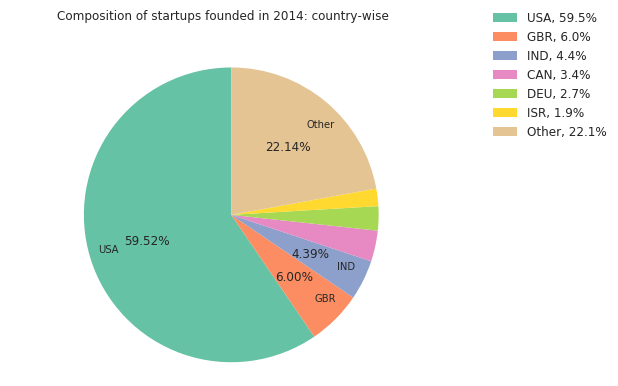

Number of unique countries=  84
Number of companies started in 2014=  4960


In [338]:
pair = get_pie_data('country_code',companies[companies['founding_year']==2014])#preparing data for pie chart
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Composition of startups founded in 2014: country-wise')#sending data to plot pie chart
print('Number of unique countries= ',len(companies[companies['founding_year']==2014]['country_code'].unique()))
print('Number of companies started in 2014= ',companies[companies['founding_year']==2014].shape[0])

As we can see __USA has the major share at almost 60%__ of the proportion of the number of startups founded in 2014, __also note the huge difference between USA and the second country Britain(6%)__ we actually checked this for multiple years and this trend is similar(although the top2-top5 countries fluctuate). Also in order for the visualization to make better sense and be more readable we have grouped all the countries other than top 6 in to the category 'Other'. This __clearly shows that USA is one of the hotspots for startups and it is a good idea to choose USA as the country to put your company if a choice is available.__

### Investments: 
There are two kinds of analysis we can do for investments
  - __'Number'__ of investments i.e look at just the number ignoring the 'amount' of each individual  investment
  - __'Amount'__ of total money invested i.e look at the amount of money invested instead of counting the number of investments 
  
#### Note: In case of investments we can have two possible countries i.e country where the company is located and the country where the investor is located. When we say country we mean the company's country by default unless mentioned otherwise.

### Number of Investments : country wise

Whenver someone wants to start a company with regard to choosing location etc they would definitely be interested in knowing the global trends and see which places are hotspots for investments, so we analyze country wise proportion of the number of investments, we choose the investments in the year 2014 (so that it stays relevant to the present) for this, we can seee the result below in a pie chart:

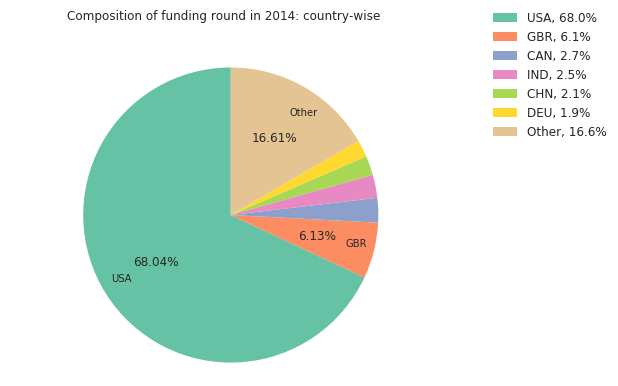

Number of total investments in 2014=  28340
Number of unique countries from which there were investments=  79
Number of unique countries which received investments=  93


In [339]:
pair=get_pie_data('company_country_code',investments[investments['funding_year']==2014])#preparing data for pie chart
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Composition of funding round in 2014: country-wise')#sending data for plotting pie chart
print('Number of total investments in 2014= ',investments[investments['funding_year']==2014].shape[0])
print('Number of unique countries from which there were investments= ',len(investments[investments['funding_year']==2014]['investor_country_code'].unique()))
print('Number of unique countries which received investments= ',len(investments[investments['funding_year']==2014]['company_country_code'].unique()))

As we can see clearly __USA overwhelmingly dominates__ other countries in this scenario too __with around 68%__ of the funding investments of the entire world happening in the USA itself, __also note the huge difference between USA and the second country Britain(around 6%)__ we again checked this for multiple years and this trend is similar(although the top2-top5 countries fluctuate a bit). Also in order for the visualization to make better sense and be more readable we have grouped all the countries other than top 6 in to the category 'Other'. This shows that __clearly USA is one of the hotspots for investment activity 'in terms of number of investments' and it is a good idea to choose USA as the country to put your company if a choice is available.__

### Amount of investments: country wise

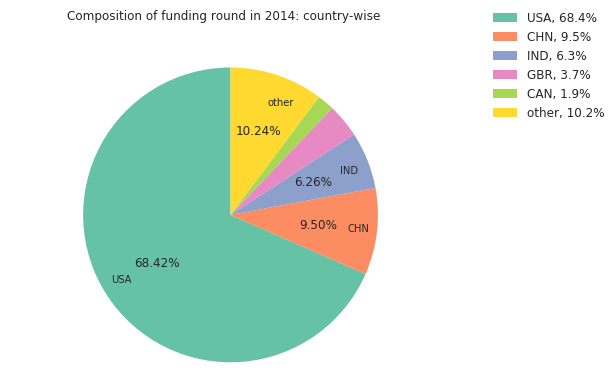

Amount of total investments in 2014 in USD=  378770.97584522923 million USD
Number of unique countries from which there were investments=  79
Number of unique countries which received investments=  93


In [340]:
#making sure null values are removed and choosing the year 2014
investments_14=investments[(pd.notnull(investments['raised_amount_usd_millions'])) & (investments['funding_year']==2014)]
# calculating the country wise investments
country_investment=investments_14[['raised_amount_usd_millions','company_country_code']].groupby('company_country_code').agg('sum')
countries=list(country_investment.index)
#convert to list
investment=country_investment['raised_amount_usd_millions'].tolist()
ci_tuple=list(zip(countries,investment))
#sorting is done so that the last few minor contributors can be grouped into one category 'other'
ci_tuple.sort(key= lambda x:x[1],reverse=True)
c,i=zip(*ci_tuple)
c=list(c)
i=list(i)
other_i=sum(i[5:])
#creating the category 'other'
c=c[:5]+['other']
i=i[:5]+[other_i]
plot_pie_chart(c,i,'Composition of funding round in 2014: country-wise')#sending data to plot pie chart
print('Amount of total investments in 2014 in USD= ',investments[investments['funding_year']==2014]['raised_amount_usd_millions'].sum(),'million USD')
print('Number of unique countries from which there were investments= ',len(investments[investments['funding_year']==2014]['investor_country_code'].unique()))
print('Number of unique countries which received investments= ',len(investments[investments['funding_year']==2014]['company_country_code'].unique()))

As we can see there is __not much of a change in USA from the previous pie chart above this BUT there is a change in China and also the category 'other'__ Clearly this shows that it is important to analyze both the amount and number of fundings. It seems that while britain has more number of investements than China but they are smaller investements and though __China has fewer investemnts but the average amount of money invested per invested is much higher in China than compared to Britain__. Similarly in the case of 'other' though there seem to be around 17% of the total investments they add up only to 10% of the total amount of money invested across the world hence this shows that the average __amount per investments is small in 'other' category__.  As we can see clearly __USA overwhelmingly dominates__ other countries in this scenario too __with around 68%__ of the funding amount of the entire world being invested in the USA itself, __also note the huge difference between USA and the second country China(around 6%)__.   we again checked this for multiple years and this trend is similar(although the top2-top5 countries fluctuate a bit). Also in order for the visualization to make better sense and be more readable we have grouped all the countries other than top 6 in to the category 'Other'. This shows that __clearly USA is one of the hotspots for investment activity 'in terms of number of investments' and it is a good idea to choose USA as the country to put your company if a choice is available.__

### Status of the startups in USA (i.e  are they successful or not?)

As USA seems to be a good place to begin looking into, the next question of interest would be to see how the startups in USA are faring i.e. what is their status. This can be easily seen with the 'status' column in the dataframe which makes note of the status of the startup as either 'operating','acquired','closed' or 'ipo'. For this we consider startups founded between 2005 to 2010 (inclusive) we do so because if we take the startups founded in 2014 they would all be runnig just because they were recently started and neet not be because they are actually successful and stood the test of time, so we choose only startups founded before 2010 as that menas they stood the test of time for atleast 5 years, also we do not go beyond 2005 just to keep the data relevant to the present. 

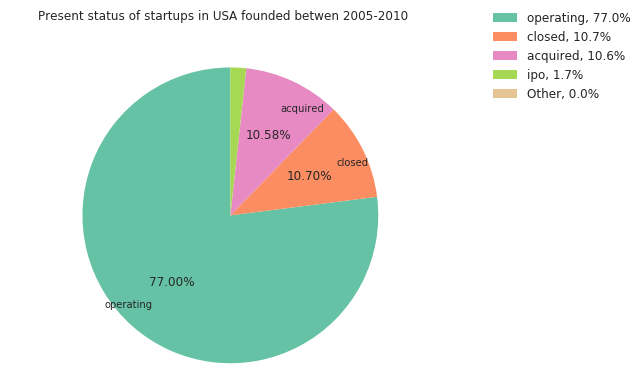

Number of companies started between 2005-2010=  16255
The various status are  ['operating' 'acquired' 'closed' 'ipo']


In [341]:
pair = get_pie_data('status',companies[(companies['founding_year']<2011)&(companies['founding_year']>2004)])#preparing data for pie chart
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Present status of startups in USA founded betwen 2005-2010')#sending data for plotting pie chart]
print('Number of companies started between 2005-2010= ',companies[(companies['founding_year']<2011)&(companies['founding_year']>2004)].shape[0])
print('The various status are ',companies['status'].unique())

Thus we can see that surprisingly only a few of them have been closed(around 11%), being acquired cannot be declared clearly as being good or bad as it can be either way depenidng on the individual case so we left the categories as such and did not combine them. It is a great sign to see that most of them i.e. __around 77% are operational, so it is not a bad scenario at all for the startups in USA__

### Trend for the number of startups(worldwide) across each year

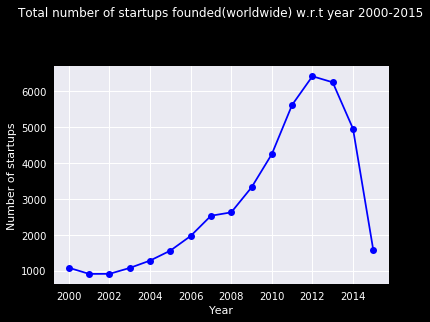

In [342]:
def get_year_wise_plot(df,years=None):
    """
    params
    df:dataframe from which the yearwise founding data must be collected 
    years:list of years for which the plot must be made 
    """
    count_list=[]
    if years==None:
        years=range(int(df['founding_year'].min()),int(df['founding_year'].max()))
    # check and collect for each  year
    for year in years:
            count_list.append(df[df['founding_year']==year].shape[0])
    # plot
    sns.set()
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)
    fig.patch.set_facecolor('xkcd:black')
    plt.plot(years,count_list, marker='o', color='b')
    plt.xlabel('Year',color='white')
    plt.ylabel('Number of startups',color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.title('Total number of startups founded(worldwide) w.r.t year '+str(min(years))+'-'+str(max(years)),color='white')
    plt.show()
    
get_year_wise_plot(companies,range(2000,2016))

The above is a plot for the number of startups founded yearwise worldwide from 2000-2010, we expected it to keep increasig but as we can see there is a fall in the number of startups after 2012, curious about this unexpected trend we went and searched online and found that the total number of startups being started is actually decreasing. We have provided the following article that discusses this: 
link:http://money.cnn.com/2016/09/08/news/economy/us-startups-near-40-year-low/index.html
In brief __"Walmartization(chains of big companies as opposed to "mom and pops" shops)", "Regulation","Big Companies acting more entrepreneurial"__ are the main reasons of the decline of new startups being set up as per the article.
![Image 1](ece143/project/decline.png)


__ Also due to the overwhelming dominance of USA it is possible that it can skew the results so we need to check for other countries as well__.Next we see the trends countrywise for the top 5 countries as per out analysis above i.e we look at the countries:['USA','GBR','IND','CAN','DEU'] i.e __USA,Britain,India,Canada,Germany__. We do this so that we can check if this trend s all over the o=world or only in the major contributor i.e. the U.S.

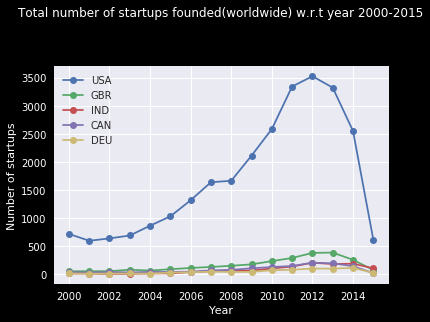

In [343]:
def get_top_country_plot(df, countries,years=range(2000,2016)):
    count_list=[[] for i in range(len(countries))]
    for i in range(len(countries)):
        for year in years:#check for country and year and collect data
            count_list[i].append(df[(df['founding_year']==year)&(df['country_code']==countries[i])].shape[0])
    #plot
    fig, ax = plt.subplots()
    for i in range(len(countries)):
        ax.plot(range(2000,2016), count_list[i], label=countries[i],marker='o')
    leg = ax.legend()
    sns.set()
    fig.patch.set_facecolor('xkcd:black')
    plt.xlabel('Year',color='white')
    plt.ylabel('Number of startups',color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.title('Total number of startups founded(worldwide) w.r.t year '+str(min(years))+'-'+str(max(years)),color='white')
    plt.show()
    

countries=['USA','GBR','IND','CAN','DEU']
get_top_country_plot(companies,countries)

__Due to the dominance of U.S.A the graphs for the other countries are not clearly visible hence we remove U.S.A from countries list and plot the graph__ for the remaining countries as follows, we can see clearly that the trend is similar for all of the countries i.e they fall off after 2012.

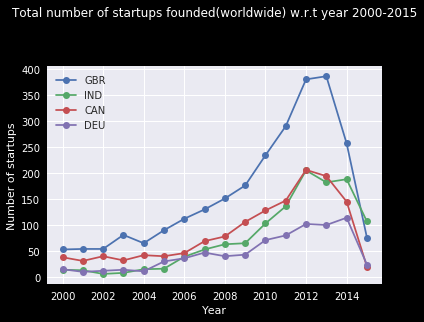

In [344]:
get_top_country_plot(companies,countries[1:])

### Investments:
Intrigued by this phenomenon we then analyzed the trends for investments(world wide) with repect to years, again we analyze both the number of investments and also the amount of investments, the results can be seen below:

### Trend for number of investments(worldwide)

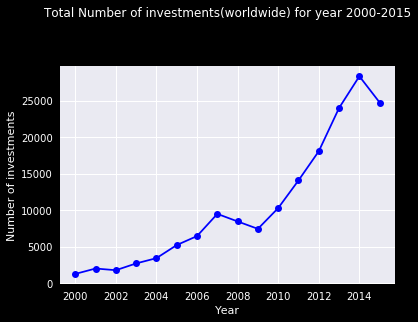

In [345]:
def get_year_wise_investments_plot(df,years=range(2000,2016),amount=False):
    count_list=[]
    if not amount:#check if count of investments is required or the amount 
        for year in years:
                count_list.append(df[df['funding_year']==year].shape[0])
    else:
        for year in years:
            count_list.append(df[df['funding_year']==year]['raised_amount_usd_millions'].sum())
    #plot
    sns.set()
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)
    fig.patch.set_facecolor('xkcd:black')
    plt.plot(years,count_list, marker='o', color='b')
    plt.xlabel('Year',color='white')
    if not amount:
        plt.ylabel('Number of investments',color='white')
    else:
        plt.ylabel('Amount of investments in USD',color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    if not amount:
        plt.title('Total Number of investments(worldwide) for year '+str(min(years))+'-'+str(max(years)),color='white')
    else:
        plt.title('Total amount of investments(worldwide) for year in USD '+str(min(years))+'-'+str(max(years)),color='white')
    plt.show() 
get_year_wise_investments_plot(investments,range(2000,2016))

### Trend for amount of investments (worldwide)

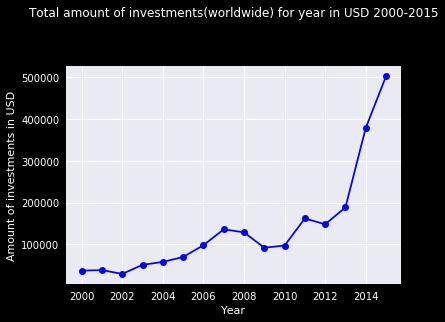

In [346]:
get_year_wise_investments_plot(investments,range(2000,2016),amount=True)

From the above two plots __we can see that the total number of investments has a fall from 2014 to 2015__ but it can be seen in the second plot that __importantly the total amount of investment has actually increased continuously__, it is possible that the __decline in number of investments__ could just be __due to the decline in number of startups__ itself, thus it looks as of there is no problem from the side of Investments currently which is a good thing for startups! <br>
__ Also due to the overwhelming dominance of USA it is possible that it can skew the results so we need to check for other countries as well__.
Next we see the trends countrywise for the top 5 countries as per out analysis above i.e we look at the countries: ['USA','GBR','IND','CAN','DEU'] i.e USA,Britain,India,Canada,Germany. We do this so that we can check if this trend is all over the world or only in the major contributor i.e. the U.S.

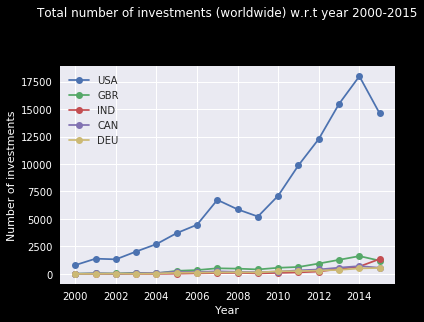

In [347]:
def get_top_country_plot(df, countries,years=range(2000,2016),amount=False):
    count_list=[[] for i in range(len(countries))]
    for i in range(len(countries)):
        if not amount:#check if count of investments is required or the amount 
            for year in years:
                count_list[i].append(df[(df['funding_year']==year)&(df['company_country_code']==countries[i])].shape[0])
        else:
            for year in years:
                count_list[i].append(df[(df['funding_year']==year)&(df['company_country_code']==countries[i])]['raised_amount_usd'].sum())

    #plot     
    fig, ax = plt.subplots()
    for i in range(len(countries)):
        ax.plot(range(2000,2016), count_list[i], label=countries[i],marker='o')
    leg = ax.legend()
    sns.set()
    fig.patch.set_facecolor('xkcd:black')
    plt.xlabel('Year',color='white')
    if not amount:
        plt.ylabel('Number of investments',color='white')
    else:
         plt.ylabel('Amount of investments in USD',color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    if not amount:
        plt.title('Total number of investments (worldwide) w.r.t year '+str(min(years))+'-'+str(max(years)),color='white')
    else:
        plt.title('Total amount of investment in USD(worldwide) w.r.t year '+str(min(years))+'-'+str(max(years)),color='white')

    plt.show()
    

countries=['USA','GBR','IND','CAN','DEU']
get_top_country_plot(investments,countries)

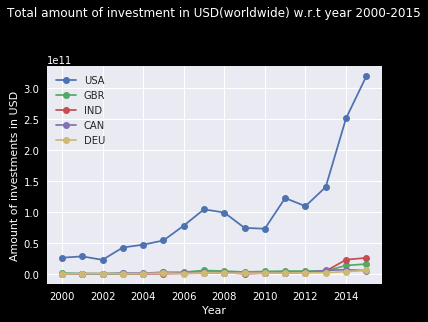

In [348]:
get_top_country_plot(investments,countries,amount=True)

__Due to the dominance of U.S.A the graphs for the other countries are not clearly visible hence we remove U.S.A from countries list and plot the graph__ for the remaining countries as follows, we can see clearly that the trend is similar for all of the countries i.e they fall off after 2012.

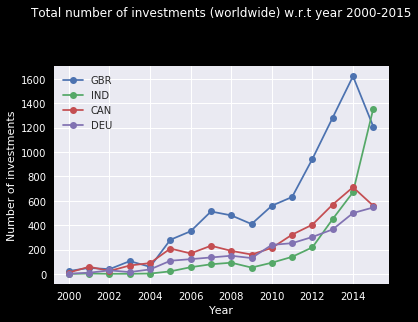

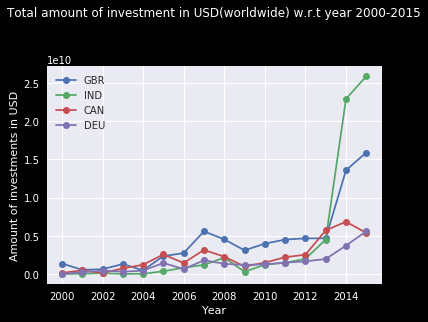

In [349]:
get_top_country_plot(investments,countries[1:])
get_top_country_plot(investments,countries[1:],amount=True)

These plots show some interesting insights in terms of the number of investments and the amount of investments there is stark contrast between Inda and the other countries shown above while most of the other countries see a decline or a small increase, __INDIA sees a huge improvement__ in both number and amount of investments, so we __can conclude from this analysis that INDIA is rapidly moving forward in the startup race__. After India Germany looks good. __Now let us look at the major investors in the world:__

### Top 6 investors in the world(ranked by total investment in all the years for which we have the data)

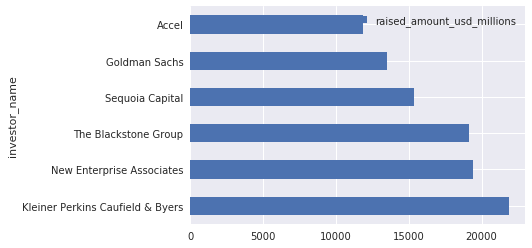

In [350]:
#groupby investor name and show top 6 according to aggregate sum
investments[investments['company_country_code']=='USA'][['investor_name','raised_amount_usd_millions']].groupby('investor_name').agg('sum').sort_values('raised_amount_usd_millions',ascending=False).iloc[:6,:].plot.barh()

Thus we can see that top 6 investors(for entire dataset) who invest in the USA are Kleiner Perkins Caufield & Byers, New Enterprise Associates,The Blackstone group, Sequoia Capital, Goldman Sachs and Accel. We can see that they invested in the range of 12000-20000 million USD! Also it isworth noting that all th e top 6 are investing large amounts i.e. __there is not drastic change between the first and second company etc in the amount invested!__

### Top 6 investors in the world for the year 2014

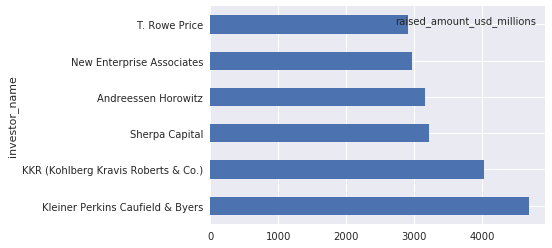

In [351]:
#groupby investor name and show top 6 for the year 2014 according to aggregate sum
investments[(investments['company_country_code']=='USA') &(investments['funding_year']==2014)][['investor_name','raised_amount_usd_millions']].groupby('investor_name').agg('sum').sort_values('raised_amount_usd_millions',ascending=False).iloc[:6,:].plot.barh()

Now we repeat the same thing we did above but then just consider the investments in the year 2014. Thus we can see that out of the previous top 6 investors only Kleiner Perkins Caufield & Byers is still in the list this shows that __they invest large amounts regularly while other companies need not do so every year__. We can see that they invested in the range of 12000-20000 million USD! Also it isworth noting that all th e top 6 are investing large amounts i.e. __there is not drastic change between the first and second company etc in the amount invested!__

#### Now that we have seen the trends for different countries and have also seen the major share of USA in this domain we decided to focus our attention on the data about startups and investments in USA 

### Investment patterns in USA

We can look at investment patterns in a number of ways first we begin our analysis by taking a look at __Foreign and Local investments__. Foreign investments are those investments where the investor is not based in U.S.A and local are those for which the investor is based in U.S.A, for both the cases the compnay is in U.S.A


### Proportion of Investments in USA coming from within USA vs Outside

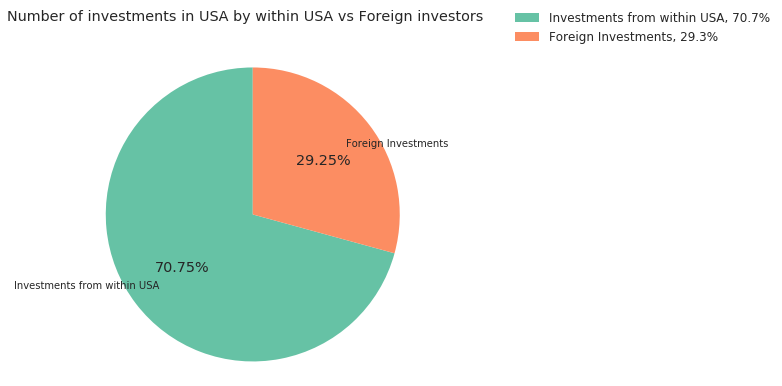

In [352]:
#select american investors
american_investments=investments[(investments['company_country_code']=='USA')&(investments['funding_year']==2014)]
#check the proportion of them investing inside vs outside
#check number of usa and non-usa investments
usa_investments=american_investments[american_investments['investor_country_code']=='USA'].shape[0]
outside_investments=american_investments[american_investments['investor_country_code']!='USA'].shape[0]
#prepare data
usa_investments*100.0/(outside_investments+usa_investments)
l=['Investments from within USA','Foreign Investments']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
#plot
plot_pie_chart(l,inv,'Number of investments in USA by within USA vs Foreign investors')

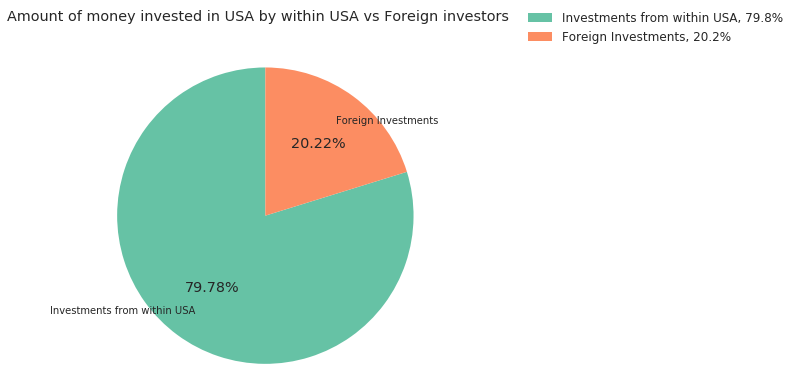

In [353]:
#select american investors
american_investments=investments[(investments['company_country_code']=='USA')&(investments['funding_year']==2014)]
#check the proportion of them investing inside vs outside
usa_investments=american_investments[american_investments['investor_country_code']=='USA']['raised_amount_usd'].sum()
outside_investments=american_investments[american_investments['investor_country_code']!='USA']['raised_amount_usd'].sum()
#prepare data
usa_investments*100.0/(outside_investments+usa_investments)
l=['Investments from within USA','Foreign Investments']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
#plot data
plot_pie_chart(l,inv,'Amount of money invested in USA by within USA vs Foreign investors')

The above two pie charts show us an indication of proportion of investment in USA coming from investors in USA vs the proportion of investment in USA coming from outside USA we see that a significant portion of investment into companies in USA comes from outside USA i.e __around 29% of the number of investments__ in USA and __around 20% of the amount of money invested__ in USA are coming from outside USA so __this means that USA is able to attract good investors from outside the country this indicates a strong ang growing startup industry__. This is just for the year 2014 but we verified that similar trends are reflected for other years too. The 9% difference between the count and amount of investments may mean that __the average foreign investment value is slightly lower than the average local investment value__.

### Proportion of investors in USA investing within vs outside USA

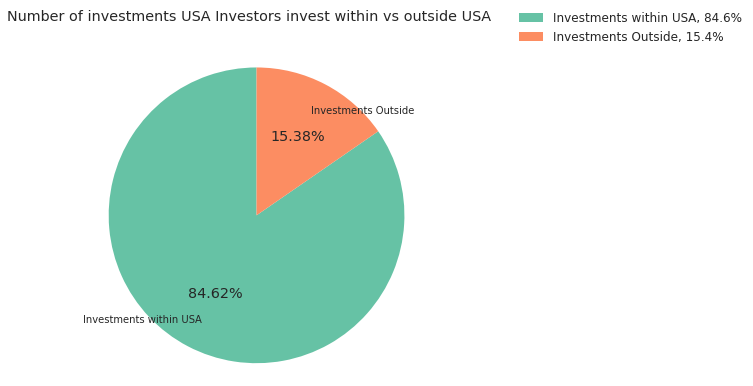

In [354]:
#select american investors
american_investors=investments[(investments['investor_country_code']=='USA')&(investments['funding_year']==2014)]
#check the proportion of them investing in america
usa_investments=american_investors[american_investors['company_country_code']=='USA'].shape[0]
outside_investments=american_investors[american_investors['company_country_code']!='USA'].shape[0]
#prepare data
l=['Investments within USA','Investments Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
#plot
plot_pie_chart(l,inv,'Number of investments USA Investors invest within vs outside USA')

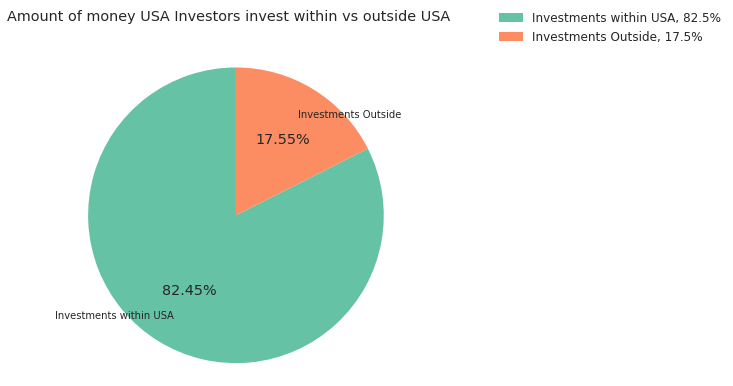

In [355]:
#select american investors
american_investors=investments[(investments['investor_country_code']=='USA')&(investments['funding_year']==2014)]
#check the proportion of them investing in america
usa_investments=american_investors[american_investors['company_country_code']=='USA']['raised_amount_usd'].sum()
outside_investments=american_investors[american_investors['company_country_code']!='USA']['raised_amount_usd'].sum()
#prepare data
l=['Investments within USA','Investments Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
#plot
plot_pie_chart(l,inv,'Amount of money USA Investors invest within vs outside USA')

The above two pie charts show us an indication of proportion of investors in USA investinf within USA vs the proportion of investors in USA investing outside USA, we  that a significant portion of investments from USA are into companies in USA i.e __around 85% of the number of investments__ are into companies in USA and __around 82% of the amount of money invested__ by USA investors is into companies in USA __this means that USA is able to retain good investors from inside the country this indicates a strong ang growing startup industry__.This is just for the year 2014 but we verified that similar trends are reflected for other years too. The difference between the count and amount of investments is lmost negligible this may mean that __the average foreign investment value is similar to the average local investment value__.

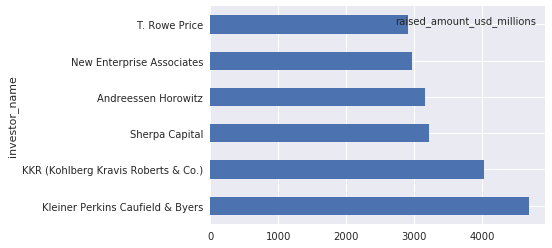

In [356]:
#group by investor name for USA investors,USA investments and show top 6 according to aggregate investments
american_investors[american_investors['company_country_code']=='USA'][['investor_name','raised_amount_usd_millions']].groupby('investor_name').agg('sum').sort_values('raised_amount_usd_millions',ascending=False).iloc[:6,:].plot.barh()

Shown above is the horizontal bar chart Thus we can see that top 6 USA investors who invested in the USA for the year 2016 are Kleiner Perkins Caufield & Byers, KKR,Sherpa Capital, Andreessen Horowitz, New Enterprise Associates and T.Rowe Price. We can see that they invested in the range of 2600-4700 million USD! Also it is worth noting that all th e top 6 are investing large amounts i.e. __there is no drastic change between the first and second company etc in the amount invested!__

### Proportion of investments of Foreign investors  within vs outside USA

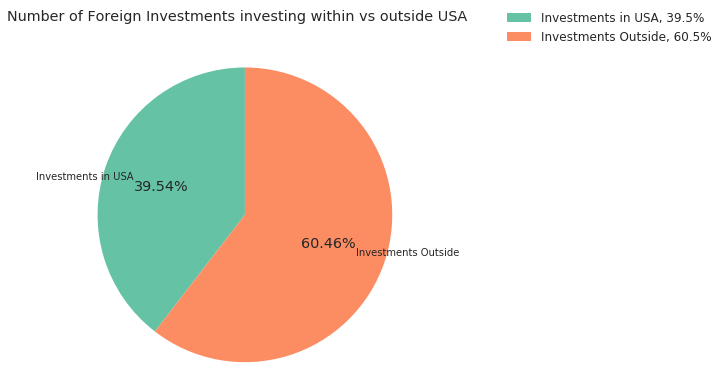

In [357]:
#select non american investors
nonamerican_investors=investments[(~(investments['investor_country_code']=='USA'))&(investments['funding_year']==2014)]
#check the proportion of them investing in america
usa_investments=nonamerican_investors[nonamerican_investors['company_country_code']=='USA'].shape[0]
outside_investments=nonamerican_investors[nonamerican_investors['company_country_code']!='USA'].shape[0]
usa_investments*100.0/(outside_investments+usa_investments)
#prepare data
l=['Investments in USA','Investments Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
#plot data
plot_pie_chart(l,inv,'Number of Foreign Investments investing within vs outside USA')

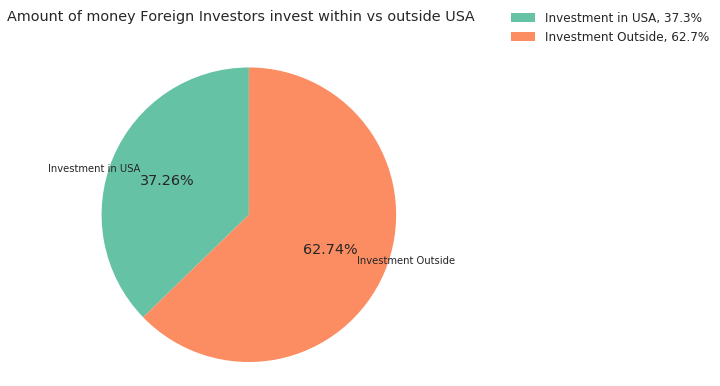

In [358]:
#select non american investors
nonamerican_investors=investments[(~(investments['investor_country_code']=='USA'))&(investments['funding_year']==2014)]
#check the proportion of them investing in america
usa_investments=nonamerican_investors[nonamerican_investors['company_country_code']=='USA']['raised_amount_usd'].sum()
outside_investments=nonamerican_investors[nonamerican_investors['company_country_code']!='USA']['raised_amount_usd'].sum()
#prepare data
usa_investments*100.0/(outside_investments+usa_investments)
l=['Investment in USA','Investment Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
#plot
plot_pie_chart(l,inv,'Amount of money Foreign Investors invest within vs outside USA')

The above two pie charts show us an indication of proportion of investors outside USA investing within USA vs the proportion of investors outside USA investing outside USA, we see that a significant portion of investments from outside USA are into companies in USA i.e __around 40% of the number of investments__ are into companies in USA and __around 37% of the amount of money invested__ by USA investors is into companies in USA __this means that foreign investors invest around 1/3rd of their money in the USA while USA investors invest around 1/5th of their money outside USA so USA is able to retain and also attract good investors this indicates a strong ang growing startup industry__.This is just for the year 2014 but we verified that similar trends are reflected for other years too. The difference between the count and amount of investments is lmost negligible this may mean that __the average foreign investment value is similar to the average local investment value__.

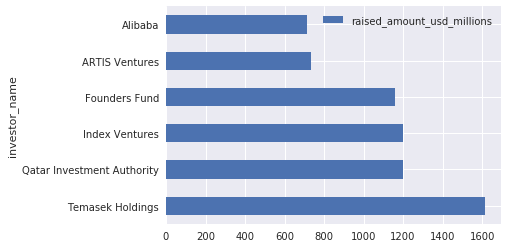

In [359]:
#group by investor name for non USA investors,USA investments and show top 6 according to aggregate investments

nonamerican_investors[nonamerican_investors['company_country_code']=='USA'][['investor_name','raised_amount_usd_millions']].groupby('investor_name').agg('sum').sort_values('raised_amount_usd_millions',ascending=False).iloc[:6,:].plot.barh()

Shown above is the horizontal bar chart for top 6 investors outside USA who invest in USA. Thus we can see that top 6 USA investors who invested in the USA for the year 2016 are Temasek Holdings, Qatar Investment Authority, Index Ventures, Founders Fund, ARTIS Ventures and Alibaba. We can see that they invested in the range of 600-1600 million USD! Also it is worth noting that all __the top 6 foreign investors are investing much less than the top 6 local USA investors also there is a significant change between the first and last company etc in the amount invested within the top 6!__

### All of these indicate that the startup sector is flourishing in the USA

### Regional distribution of startups within the USA

#### Helper functions for plotting

In [360]:
# country wise percentage of number of startups
# Helper funtion to process the data in terms of state code
def state_data(s,df):
    #assert isinstance(s, basestring)
    #assert isinstance(df, pd.core.frame.DataFrame)
    
    df = df[pd.notnull(df[s])]
    label = list(df[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(df[s]).count(item))
    
    pair = list(zip(label,frequency))
    pair.sort(key=lambda x:x[1], reverse=True)
    #remove sorting as it is not needed
    state=list(range(len(pair)))
    num=list(range(len(pair)))
    for i in range(len(pair)):
        state[i] = pair[i][0]
        num[i] = pair[i][1]
    state_df = pd.DataFrame(
    {'state_code': state,
     'number_startups': num,
    })
    
    return(state_df)
def plot_choropleth(df,plot_title):
        init_notebook_mode(connected=True)
        

        scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                    [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

        data = [ dict(
                type='choropleth',
                colorscale = scl,
                autocolorscale = False,
                locations = df['state_code'],
                z = df['number_startups'].astype(float),
                locationmode = 'USA-states',
                marker = dict(
                    line = dict (
                        color = 'rgb(255,255,255)',
                        width = 2
                    ) ),
                colorbar = dict(
                    title = "Number of Startups")
                ) ]

        layout = dict(
                title = plot_title,
                geo = dict(
                    scope='usa',
                    projection=dict( type='albers usa' ),
                    showlakes = True,
                    lakecolor = 'rgb(255, 255, 255)'),
                     )

        fig = dict( data=data, layout=layout )
        plotly.offline.iplot( fig, filename='d3-cloropleth-map' )

In [361]:
#select startups in founded in USA in 2014 
df_2014_US=companies[(companies['country_code']=='USA')&(companies['founding_year']==2014)]
plot_choropleth(state_data('state_code',df_2014_US),'2014 US New Startups by State')

The above plot shows the frequency of New Startups set up in US by State, the frequency-color map is provided at the right side in the legend. We can see that __California has the highest frequency followed by New York__ and Texas, this is quite as expected owing to the presence of __silicon valley__ and bay area, New York is also expected as it is also a well known hub for startups, so this mkes complete sense!
__Next we look at if there is any regional specificity for the startups i.e is any state/region famous for a particular category of company?__ 

### Is any State/Region famous for a particular type of company?

This was not as straight forward as it seemed especially owing to the data, we do have a column  'company_category' but we have too many categories and also each for each company we do not have a single categories, rather we have a sting of categories assigned to each company like for the followign example:
__'Application Platforms|Real Time|Social Network Media'__


In [410]:
companies['category_list'].iloc[0]

'Application Platforms|Real Time|Social Network Media'

Thus we preprocess this and split each string at '|' to get a the lsit of categories and even then we cannot do direct analysis like percentage of a  certain category of startups in a state etc as each startup can have multiple categpories so instead of doing that we look for a few key words in the string and the check, as shown below: 

In [363]:
def particular_category(companies,name,title):
    companies = companies[pd.notnull(companies['country_code'])]#remove null values
    #select USA
    usa = companies[companies['country_code']=="USA"]
    usa = usa[pd.notnull(usa['category_list'])]
    #check if string is present
    usa = usa[ (usa['category_list'].str.contains(name, case=False))]
    #plot
    plot_choropleth(state_data('state_code',usa),title)
particular_category(companies,'fintech','Fintech companies')

The above plot shows the frequency of 'FinTech' startups, the frequency-color map is provided at the right side in the legend. We can see that __California has the highest frequency and is very closely followed by New York__ , this is quite as expected owing to the presence of __silicon valley__ and bay area, New York is very well known for fintech companies sice many years hece it is a hub for them, actually we expected New York to be having the highest frequency but it turns out that California has a sightly higher number of them.

In [364]:
particular_category(companies,'software','Software companies')

The above plot shows the frequency of 'Software' startups, the frequency-color map is provided at the right side in the legend. We can see that __California has the highest frequency and followed by New York__ , this is quite as expected owing to the presence of __silicon valley__ and bay area, New York is also a good palce for software companies since many years hence it is a hub for them, so this is as expected.

In [365]:
particular_category(companies,'chemicals','Chemical companies')

The above plot shows the frequency of 'Chemical' startups, the frequency-color map is provided at the right side in the legend. We can see that __California has the highest frequency and is followed by Texas__. his makes sense as texas is known for this.

In [366]:
particular_category(companies,'farming','Farming companies')

The above plot shows the frequency of 'Farming' startups, the frequency-color map is provided at the right side in the legend. We can see that __California, Texas and Ohio share the first place__. This makes sense as these are known for farming.

In [367]:
particular_category(companies,'Oil & Gas','Oil and Gas companies')

The above plot shows the frequency of 'Oil and Gas' startups, the frequency-color map is provided at the right side in the legend. We can see that __Texas has the highest frequency and is followed by California. This makes sense as presense of an industry depends on the availability of resources.

In [368]:
particular_category(companies,'textiles','Textile companies')

The above plot shows the frequency of 'Textile' startups, the frequency-color map is provided at the right side in the legend. We can see that __Wasington and few states in the East share the first place This is the only category where we do not see a dominant presence of California.__

### Thus from the above plots we can conclude that the location of a an industry does depend on the availability of resources, for example oil and gas companies are in Texas, farming companies have one disribution while textile companies have another distribution etc also idustries like software etc where the resources are humans are present at many states as compared ot oil and gas companies. There are also cstates like California which is good for almost any kind of category!  

### Regionwise analysis for investments

In [369]:
temp_investments = investments[(investments['investor_country_code'] == 'USA')&(investments['funding_year']==2014)]
temp_investments = temp_investments[pd.notnull(temp_investments['investor_state_code'])]
plot_choropleth(state_data('investor_state_code',temp_investments),'2014 USA investors location by state')


In [370]:
temp_investments = investments[(investments['investor_country_code'] == 'USA')&(investments['funding_year']==2014)]
temp_investments = temp_investments[pd.notnull(temp_investments['company_state_code'])]
plot_choropleth(state_data('company_state_code',temp_investments),'Investments (by USA investors) in USA in 2014 by State')

__These plots are quite as expected with California taking majority of the investments followed by New York but what is interesting to note is the significant difference between Californiaand New York(California has around 3.5 times more)__

### Now let us investigate the investments more:

When ever a company looks for funding it is important to know who would be their ideal investors so that they could approach them, this would depend on the level of maturity of the company etc. Usually we might expect two kinds of patterns in the investors, a few investrs might invest small amounts into a large number of companies hoping at lest a few of them would succeed (the more the number of companies the more the chance of at least one or two of them succeeding), while others might follow the approach of carefully investing large amounts on a few select companies which migth have more probability to succeed i.e. a hight risk and high gain possibility. So we would like to analyze for these trends and then once we see companies following the trend of 
making large number of smaller investments then we could suggest a founder to look for an investor from among this list in cse he is at the starting stage and needs a small amount of funding to begin with, as the company gets more mature a founder/co-founder can taget the investors playing the high risk-high gain strategy. Thus this analysis would be useful for the companies.

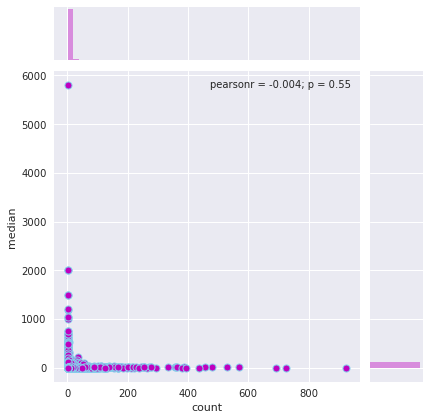

In [371]:
df_investor2d=investments[pd.notnull(investments['raised_amount_usd_millions'])&(pd.notnull(investments['raised_amount_usd_millions']))&(investments['funding_year']>=2010)]
#groupby investor name and find the count,median
df_investor2d=df_investor2d[['investor_name','raised_amount_usd_millions']].groupby(['investor_name']).agg(['count','median'])
#plot the count, median tuple
sns.jointplot(x=df_investor2d['raised_amount_usd_millions']['count'], y=df_investor2d['raised_amount_usd_millions']['median'], kind='scatter',\
              color='m', edgecolor="skyblue", linewidth=1,s=50)

As we can see _there are some investors_ following the two trends we expected i.e those who make many small investments (towards the bottom right) and those who make only a few but high investments (top left). So we can use this analysis for recommending the appropriate investors to the startups! NOw let us analyze further and look more carefully into these two kinds of investors and see if we can extract any more patterns.
__let us look at investors which have invested in more than 200 comapnies__

In [372]:
# choose the investors with more than 200 investments and show top 10
df_investor2d[df_investor2d['raised_amount_usd_millions']['count']>200].sort_values([('raised_amount_usd_millions', 'count')], ascending=False).iloc[:10,:]

raised_amount_usd_millions           
                                                      count     median
investor_name                                                         
Wayra                                                   923   0.063228
Start-Up Chile                                          724   0.040000
500 Startups                                            693   1.000000
Sequoia Capital                                         570  15.745188
New Enterprise Associates                               531  15.000000
Accel                                                   479  12.600000
Kleiner Perkins Caufield & Byers                        457  20.000000
SV Angel                                                438   2.142500
Y Combinator                                            394   0.500000
Andreessen Horowitz                                     386  10.375000

Thus the above are the startups which invest small amounts into many companies, it is quite expected to see names like __Y Combinator__ and __500 Startups__ to make this list, they are quite well known investors and also they onvest small amounts into lot of companies, so the results are as expected and also useful as we can suggest the companies other investors in this group as well! __Now let us go another step deeper and analyze one of these investors more__ we chose __Y Combinator__ and the reson behind choosing it is just because it is a company we heard a lot about and we were curious.

In [373]:
#choose y combinator investments
df_ycomb=investments[pd.notnull(investments['investor_name'])&pd.notnull(investments['funding_round_type'])&(investments['funding_year']>=2010)]
df_ycomb=df_ycomb[df_ycomb['investor_name'].str.contains('y combinator',False)]
print('number of investments made by Y Combinator after 2010-2015 = ',df_ycomb.shape[0])

number of investments made by Y Combinator after 2010-2015 =  690


In [374]:
print('The various funding round types are ',df_ycomb['funding_round_type'].unique())

The various funding round types are  ['seed' 'venture' 'convertible_note' 'undisclosed' 'product_crowdfunding'
 'angel' 'debt_financing']


Although the number of companies is 394 we can see the total funding are almost double (this is probably because Y Combinator invests a small amount twice in a company)<br>
__Now let us see the types of investments made by Y combinator__.
We will look specifically at the 'funding_round_type' which is 'seed', 'venture', 'convertible_note', 'undisclosed','product_crowdfunding', 'angel' and 'debt_financing'.

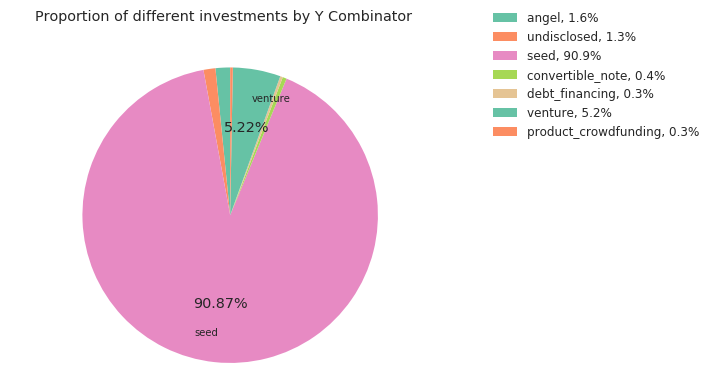

In [375]:
funding_typewise={}
total=df_ycomb.shape[0]
for fund in df_ycomb['funding_round_type'].unique():
    funding_typewise[fund]=funding_typewise.get(fund,0)+df_ycomb[df_ycomb['funding_round_type']==fund].shape[0]/total
plot_pie_chart(list(funding_typewise.keys()),list(funding_typewise.values()),'Proportion of different investments by Y Combinator')

Thus we can see that most of it __(almost 91%) is seed__ which is the funding given to a company at its inception it is usually small amount and this is what __we would expect for Y Combinator or any other investor which invests small amounts into many companies.__

### Regionwise investments of Y Combinator

In [376]:
plot_choropleth(state_data('company_state_code',df_ycomb),'Regionwise investments of Y Combinator 2010-2015')

__ This shows that Y Combinator invests mostly in California although it investe in other places as well, so new companies in california can definitely approach them__

In [377]:
df_ycomb=df_ycomb[pd.notnull(df_ycomb['company_category_list'])]

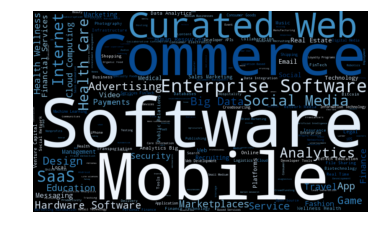

In [378]:
#plot word cloud to see different categories
flat_list = [category+' ' for sublist in df_ycomb['company_category_list'].apply(lambda x:x.split('|')).tolist() for category in sublist]
wordcloud = WordCloud(width=800, height=480, margin=0,colormap="Blues").generate(''.join(flat_list))#conver to string
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

__This shows that there are many different categories and none of them are a clear majority (the biggest words which are more frequent are very generic) hence this is a clear indication that Y Combinator is not very specific with the category of the company. And this is what we can expect in general from investors who invest small amounts in a lot of companies.__

### Now let us look at the investors which invest large amounts in small number of companies

In [379]:
#select companies which have a median investment of more than 50 million and invest in more than 15
df_investor2d=investments[pd.notnull(investments['raised_amount_usd_millions'])&(pd.notnull(investments['raised_amount_usd_millions']))&(investments['funding_year']>=2010)]
df_investor2d=df_investor2d[['investor_name','raised_amount_usd_millions']].groupby(['investor_name']).agg(['count','median'])
df_investor2d[(df_investor2d['raised_amount_usd_millions']['median']>50)&(df_investor2d['raised_amount_usd_millions']['count']>15)].sort_values([('raised_amount_usd_millions', 'count')]).iloc[:5,:]

raised_amount_usd_millions       
                                              count median
investor_name                                             
Jennison Associates                              16   65.0
Adage Capital Management                         17   55.0
Valiant Capital Partners                         17   80.0
Coatue Management                                17  100.0
Brookside Capital                                18   63.0

So these are the investors who invest in a few companies but invest substanitial amounts, now let us go another step deeper and analyze one of these investors more, we chose __Adage Capital management__ and there is no special reson behind choosing it.

In [380]:
df_adage=investments[pd.notnull(investments['investor_name'])&pd.notnull(investments['funding_round_type'])&(investments['funding_year']>=2010)]
df_adage=df_adage[df_adage['investor_name']=='Adage Capital Management']
print('number of investments made by Adage Combinator after 2010-2015 = ',df_adage.shape[0])

number of investments made by Adage Combinator after 2010-2015 =  17


As expected it has 17 investments

In [381]:
print('The various funding round types are ',df_adage['funding_round_type'].unique())

The various funding round types are  ['venture' 'private_equity']


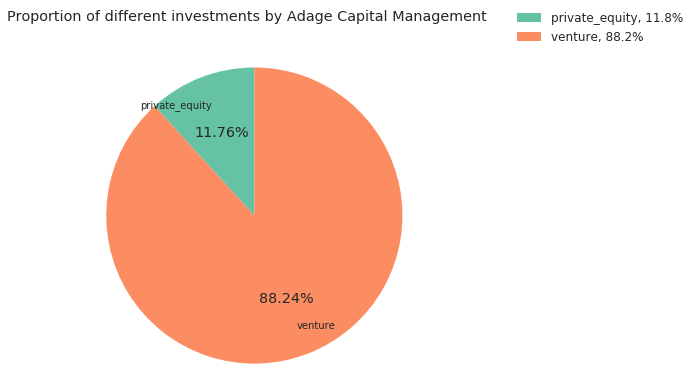

In [382]:
funding_typewise={}
total=df_adage.shape[0]
for fund in df_adage['funding_round_type'].unique():
    funding_typewise[fund]=funding_typewise.get(fund,0)+df_adage[df_adage['funding_round_type']==fund].shape[0]/total
plot_pie_chart(list(funding_typewise.keys()),list(funding_typewise.values()),'Proportion of different investments by Adage Capital Management')

Thus we can see that most of it __(around 88%) is venture__ which is the funding given to a company in its later stages it is usually much higher amount than the seed and this is what __we would expect for Adage Capital management or any other investor which invests large amounts into few companies after they have proven themselves.__


In [383]:
plot_choropleth(state_data('company_state_code',df_adage),'Regionwise investments of Adage Capital Management 2010-2015')

__ This shows that Adage Capital management invests mostly in California and is much more specific than Y Combinator in terms of region of investment, so mature startups in california can definitely approach them__

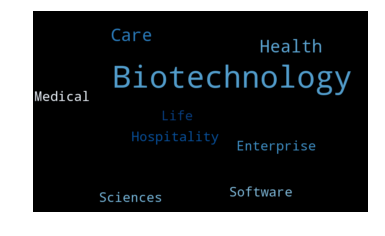

In [384]:
#show word cloud ot display the different categories
df_adage=df_adage[pd.notnull(df_adage['company_category_list'])]
l=df_adage['company_category_list'].apply(lambda x:x.split('|')).tolist()
l=l[:1]+l[2:]#removing noisy data after manual inspection
flat_list = [category+' ' for sublist in l for category in sublist]
wordcloud = WordCloud(width=800, height=480, margin=0,colormap="Blues").generate(''.join(flat_list))#conver to string
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

__This shows that there is a very specific set of companies i.e those related with Biotechnology and healthcare are the ones which are funded by Adage. A clear indication that Adage is very very specific with the category of the company. And this is what we can expect in general from investors who invest large amounts but only in some companies.__

### Venture vs Seed

Let us see the average venture funding and the average seed funding

In [328]:
print('average venture funding = ', investments[investments['funding_round_type']=='venture']['raised_amount_usd_millions'].mean())
print('average venture seed = ', investments[investments['funding_round_type']=='seed']['raised_amount_usd_millions'].mean())

average venture funding =  18.424455694917903
average venture seed =  1.23002713272142


Thus we can clearly see that seed funding is very less compared to venture funding

Let us see the average venture funding for rounds A,B,C

In [391]:
temp_investments = investments[(pd.notnull(temp_investments['funding_round_code']))&(investments['funding_round_type']=='venture')]
print('average venture funding in round A = ',temp_investments[temp_investments['funding_round_code']=='A']['raised_amount_usd_millions'].mean())
print('average venture funding in round B = ',temp_investments[temp_investments['funding_round_code']=='B']['raised_amount_usd_millions'].mean())
print('average venture funding in round C = ',temp_investments[temp_investments['funding_round_code']=='C']['raised_amount_usd_millions'].mean())

average venture funding in round A =  9.436141177628997
average venture funding in round B =  22.22570720746635
average venture funding in round C =  35.55073479696307


Thus we can see that within the venture round too the funding keeps increasing! let us analze it with a pie chart:

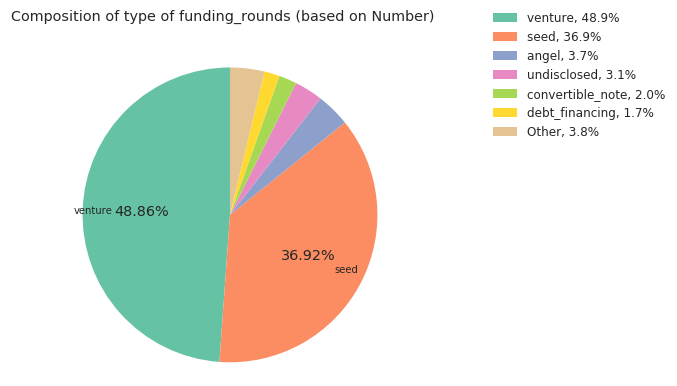

In [385]:
pair=get_pie_data('funding_round_type',investments[investments['funding_year']==2014])
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Composition of type of funding_rounds (based on Number)')

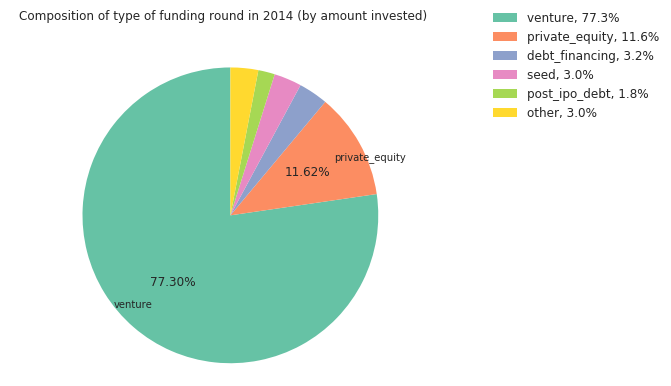

In [203]:
temp_investments=investments[(pd.notnull(investments['raised_amount_usd'])) & (investments['funding_year']==2014) ]
country_investment=temp_investments[['raised_amount_usd','funding_round_type']].groupby('funding_round_type').agg('sum')
countries=list(country_investment.index)
investment=country_investment['raised_amount_usd'].tolist()
ci_tuple=list(zip(countries,investment))
ci_tuple.sort(key= lambda x:x[1],reverse=True)
c,i=zip(*ci_tuple)
c=list(c)
i=list(i)
other_i=sum(i[5:])
c=c[:5]+['other']
i=i[:5]+[other_i]
plot_pie_chart(c,i,'Composition of type of funding round in 2014 (by amount invested)')

__ From the above two pie charts we can clearly see that seed and venture fundings dominae if we see as per 'number' of investments, but if we consoder the amount of investments we can see that seed is ery very minor portion amount of the investments, this is understandable because the amount of seed funding is quite small thus it forms a very low proportion in total amount even though it has the highest proportion in the number of investments__

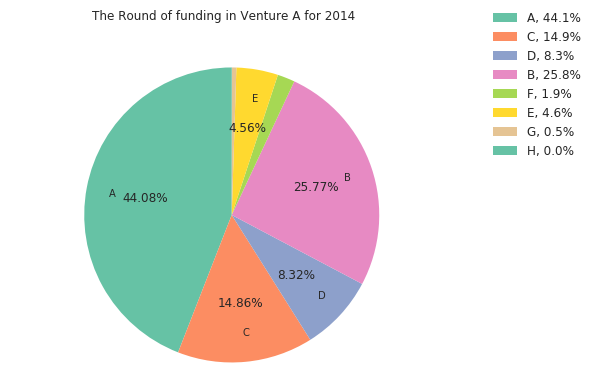

In [250]:
temp_investments = investments[(investments['funding_round_type'] == 'venture')& (investments['funding_year'] == 2014)&(investments['company_country_code'] == 'USA')]
temp_investments = temp_investments[pd.notnull(temp_investments['funding_round_code'])]
label = list(temp_investments['funding_round_code'].unique())
size = []
for item in label:
    size.append(list(temp_investments['funding_round_code']).count(item))
    
plot_pie_chart(label, size, 'The number of round types of funding in Venture A for 2014')

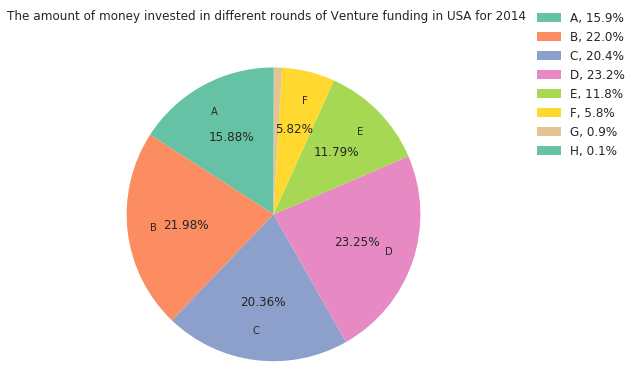

In [252]:
df = temp_investments['raised_amount_usd'].groupby(temp_investments['funding_round_code']).agg('sum')
label = list(df.index)
size = df.tolist()
plot_pie_chart(label, size, 'The amount of money invested in different rounds of Venture funding in USA for 2014')

__The above two pie charts show that for venture rounds the frequency decreases as we go from round A to B to C etc but the second chart and the previous calculations we did show that the average funding keps increasing by a lot as we go from round A to b to C and so on__ 

### Now we focus on Successful vs Unsuccessful startups and analyze if we can find any differences

### Does the time/month when the company was started has any affect on its success?

As investors like Y-Combinators fund at specific times in a year we felt it is posisble that investments might be easier to get at specific times of the year, and as investments might be important to success so it is possible that the success or failure might depend on the time of the year when the company was started hence we analyzed that:

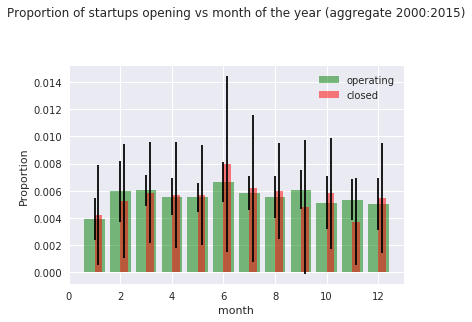

In [392]:
def monthly_analysis(year_lis):
    temp1=[]
    temp2=[]
    for year in year_lis:
        dfnew_s=companies[(companies['founding_year']==year) &(companies['country_code']=='USA')&(companies['status']=='operating')]
        dfnew_f=companies[(companies['founding_year']==year) &(companies['country_code']=='USA')&(companies['status']=='closed')]

        monthly_count_s=[]
        monthly_count_f=[]
        for month in range(1,13):
            monthly_count_s.append(sum(dfnew_s['founding_month']==month))
            monthly_count_f.append(sum(dfnew_f['founding_month']==month))
        temp1.append([x/sum(monthly_count_s) for x in monthly_count_s])
        temp2.append([x/sum(monthly_count_f) for x in monthly_count_f])
    temp1=np.array(temp1)/len(year_lis)
    temp2=np.array(temp2)/len(year_lis)
    mean1=np.mean(temp1,axis=0)
    std1=np.std(temp1,axis=0)
    mean2=np.mean(temp2,axis=0)
    std2=np.std(temp2,axis=0)
    fig, ax = plt.subplots()
    ax.bar(range(1,13), mean1, yerr=std1,ecolor='black',color='green',align='center',label='operating', alpha=0.5,capsize=10)
    ax.bar(range(1,13), mean2, yerr=std2,ecolor='black',width=0.3,color='red',align='edge',label='closed', alpha=0.5,capsize=10)
    ax.set_ylabel('Proportion')
    plt.legend(loc='upper right')
    ax.set_xlabel('month')
    ax.set_title('Proportion of startups opening vs month of the year (aggregate 2000:2015)')
    plt.show()
companies=companies[~((companies['founding_day']==1)&(companies['founding_month']==1))]
monthly_analysis(range(2000,2015))

__In the above plot the green corresponds to successful startups started in that month and red to closed startups started in that month, the error bars are in black, as we can see there is no clear evidence to differentiate or say that this is a factor that can effect the success rate.__

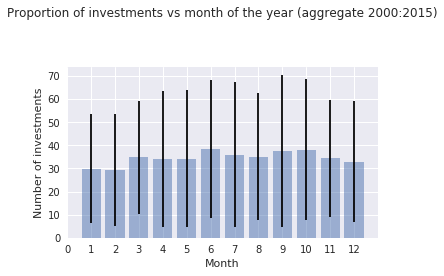

In [393]:
def monthly_analysis(year_lis):
    temp=[]
    for year in year_lis:
        dfnew=investments[(investments['funding_year']==year) & (investments['company_country_code']=='USA')]  
        monthly_count=[]
        for month in range(1,13):
            monthly_count.append(sum(dfnew['funding_month']==month))
        temp.append(monthly_count)
    temp=np.array(temp)/len(year_lis)
    mean=np.mean(temp,axis=0)
    std=np.std(temp,axis=0)
    fig, ax = plt.subplots()
    ax.bar(range(1,13), mean, yerr=std,ecolor='black',align='center', alpha=0.5,capsize=50)
    ax.set_ylabel('Number of investments')
    ax.set_xticks(range(13))
    ax.set_xlabel('Month')
    ax.set_title('Proportion of investments vs month of the year (aggregate 2000:2015)')
    plt.tight_layout()
    plt.show()
investments=investments[~((investments['funding_day']==1)&(investments['funding_month']==1))]
monthly_analysis(range(2000,2015))

__ In the above plot the blue corresponds to proportion of investments in that month, the error bars are in black, as we can see there is no clear evidence to differentiate or say that funding is not good in a particular time of the year orto say that this is a factor that can effect the success rate __

### Do Number of funding rounds make a difference?

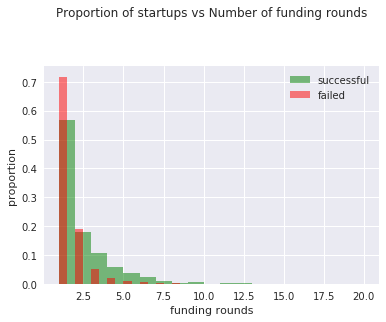

In [395]:
s_fr=companies[(companies['status']=='operating')& (companies['founding_year']<2011)&(companies['founding_year']>2004)]['funding_rounds'].tolist()
f_fr=companies[(companies['status']=='closed')& (companies['founding_year']<2011)&(companies['founding_year']>2004)]['funding_rounds'].tolist()
bins = np.linspace(1, 20, 20)
plt.hist(s_fr, bins, alpha=0.5, label='successful',color='green', normed=True)
plt.hist(f_fr, bins, alpha=0.5,width=0.5,color='red', label='failed', normed=True)
plt.legend(loc='upper right')
plt.xlabel('funding rounds')
plt.ylabel('proportion')
plt.title('Proportion of startups vs Number of funding rounds')
plt.show()

In the above plot the green bars are the proportion of successfult startups that have taken that many round of funding while the red ones correspond to closed startups. This trend makes sense and does look promising, it makes sense because failed startups have higher proportion for 1,2 rounds of funding which is as expected as usually successful startups will usually have more than 2 rounds of funding and hence their proportion would be less when compared to cosed ones, also it is promising because as we can see __if a company has taken more than 4 rounds of fundning it is a good indicator that it will be successful with high probability.__

### Does the total amount of funding make a difference?

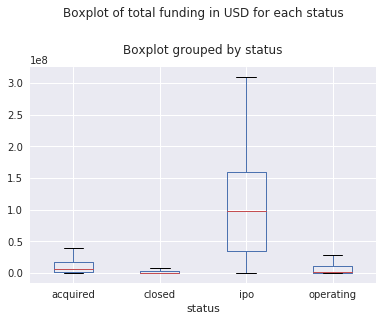

In [298]:
rcParams['axes.titlepad'] = 50
temp_companies.boxplot(column='funding_total_usd',by='status',showfliers=False)
plt.title("Boxplot of total funding in USD for each status")

__The boxplot shows that there is a huge difference between funding for companies with status 'ipo' and the remaining status!__

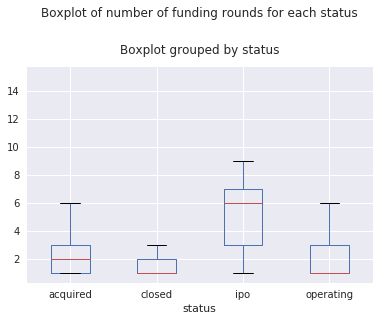

In [303]:
rcParams['axes.titlepad'] = 50
temp_companies.boxplot(column='funding_rounds',by='status')
plt.title("Boxplot of number of funding rounds for each status")

__Again we see that the boxplot shows that there is a huge difference between funding rounds for companies with status 'ipo' and the remaining status!__

### What is the optimal amount of time in months between starting a company and to get first funding?

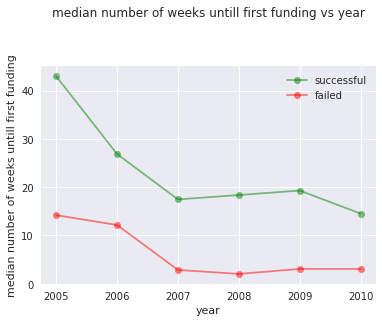

In [397]:
temp_companies=companies[(pd.notnull(companies['status']))&(companies['country_code']=='USA')&(companies['founding_year']>=2005)&(companies['founding_year']<=2010)]
temp_s=[]
temp_f=[]
for year in range(2005,2011):
    df_years=temp_companies[(temp_companies['founding_year']==year)&(temp_companies['status']=='operating')]
    temp_s.append(df_years['difference'].median())
    df_yearf=temp_companies[(temp_companies['founding_year']==year)&(temp_companies['status']=='closed')]
    temp_f.append(df_yearf['difference'].median())
plt.plot(range(2005,2011),temp_s, alpha=0.5, label='successful',color='green',marker='o')
plt.plot(range(2005,2011),temp_f, alpha=0.5,color='red', label='failed',marker='o')
plt.legend(loc='upper right')
plt.xlabel('year')
plt.ylabel('median number of weeks untill first funding')
plt.title('median number of weeks untill first funding vs year')
plt.show()

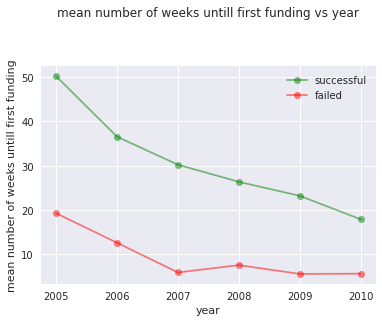

In [398]:
temp_companies=companies[(pd.notnull(companies['status']))&(companies['country_code']=='USA')&(companies['founding_year']>=2005)&(companies['founding_year']<=2010)]
temp_s=[]
temp_f=[]
for year in range(2005,2011):
    df_years=temp_companies[(temp_companies['founding_year']==year)&(temp_companies['status']=='operating')]
    temp_s.append(df_years['difference'].mean())
    df_yearf=temp_companies[(temp_companies['founding_year']==year)&(temp_companies['status']=='closed')]
    temp_f.append(df_yearf['difference'].mean())
plt.plot(range(2005,2011),temp_s, alpha=0.5, label='successful',color='green',marker='o')
plt.plot(range(2005,2011),temp_f, alpha=0.5,color='red', label='failed',marker='o')
plt.legend(loc='upper right')
plt.xlabel('year')
plt.ylabel('mean number of weeks untill first funding')
plt.title('mean number of weeks untill first funding vs year')

plt.show()

__The above two plots show the median and mean for the gap in months between the date of founding the company and getting first funding. Quite surprisingly this gap decreases across the years for both successfl and unsuccessfule companies this shows that the investments are becoming easier to get BUT for some reason closed companies have clearly lower gaps than successful companies, we are not yet sure if this is a valid trend or due to some skewed data, that is why we tried looking at both the mean and the median in hope to avoid the skewed data but still we could not overcome it nor could we find a valid explanation for why such a trend occurs__.

### Box plots for the duration in months between establishing and first funding for all types of status

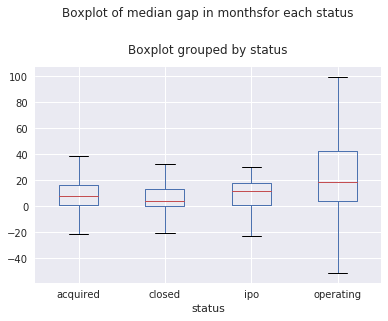

In [288]:
rcParams['axes.titlepad'] = 50
temp_companies.boxplot(column='difference',by='status',showfliers=False)
plt.title("Boxplot of median gap in months for each status")

__Box plot also show the same relation between successful and closed startups' gap in months between starting the company and first funding__

### The box plots below show the same thing but across time

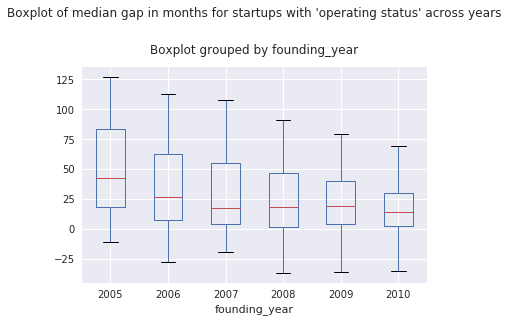

In [304]:
rcParams['axes.titlepad'] = 50
temp_companies[temp_companies['status']=='operating'].boxplot(column='difference',by='founding_year',showfliers=False)
plt.title("Boxplot of median gap in months for startups with 'operating status' across years")

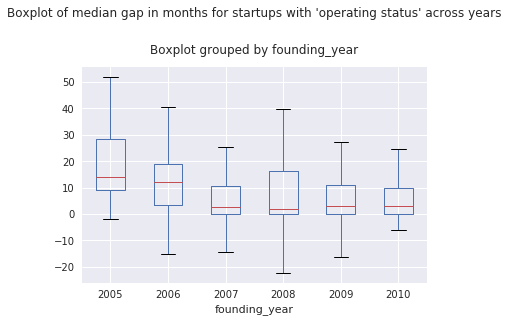

In [305]:
rcParams['axes.titlepad'] = 50
temp_companies[temp_companies['status']=='closed'].boxplot(column='difference',by='founding_year',showfliers=False)
plt.title("Boxplot of median gap in months for startups with 'operating status' across years")

### Analysis of the gaps between funding rounds for successful vs unsuccessful companies

__First we need to combine the dataframes to get the information we need__

In [411]:
# group the investments by company name so that we can get the total funding rounds for each company

In [400]:
investment_round_wise=investments[['company_name','funded_at_date']].groupby('company_name').aggregate(lambda x:sorted(list(set(x)),reverse=0))
company=list(investment_round_wise.index)
funding_rounds=investment_round_wise['funded_at_date'].tolist()
funding_rounds_df = pd.DataFrame(
    {'name': company,
     'rounds': funding_rounds
    })
funding_rounds_df.head(5)

,name,rounds
0,"#BratPackStyle, LLC.",[2015-06-01]
1,#waywire,[2012-06-30]
2,'Rock' Your Paper,"[2012-08-09, 2013-12-01]"
3,.,[2015-01-15]
4,.FOX Networks,[2007-01-16]


In [412]:
#merge this information with the information of company's status etc from the other dataframe

In [401]:
companies_short=companies[['name','status','founded_at_date']]
merged=pd.merge(companies_short, funding_rounds_df, on='name', how='inner')
merged['number_rounds']=merged['rounds'].apply(lambda x:len(x))
merged.head(5)

,name,status,founded_at_date,rounds,number_rounds
0,One Inc.,operating,2011-08-01,"[2011-07-20, 2013-02-05, 2014-02-05]",3
1,1 Mainstream,acquired,2012-03-01,[2015-03-17],1
2,1000memories,acquired,2010-07-01,[2011-02-16],1
3,ZenChef,operating,2010-11-20,"[2012-12-15, 2012-12-27, 2013-10-25, 2013-11-1...",5
4,Redox,operating,2014-07-04,"[2014-11-26, 2015-10-20]",2


In [413]:
#modify the dates to get the gaps in successive funding rounds

In [403]:
def gaps(x):
    temp=[]
    for i in range(1,len(x)):
        temp.append((x[i]-x[i-1]).days/30)
    return temp
merged['founded_at_date']=merged['founded_at_date'].apply(lambda x:[x])
merged['rounds0']=merged['founded_at_date']+merged['rounds']
merged['gaps']=merged['rounds0'].apply(lambda x:gaps(x))
merged['founded_at_date']=merged['founded_at_date'].apply(lambda x:x[0])
merged['founding_year']=merged['founded_at_date'].apply(lambda x:x.year)
trimmed_merged=merged[(merged['founding_year']>2004)&(merged['founding_year']<2011)]


In [416]:
#collect the info for successful companies

In [405]:
rounds_operating=[]
for i in range(len(trimmed_merged['number_rounds'].unique())):
    temp_df=trimmed_merged[(trimmed_merged['number_rounds']==i+1)&(trimmed_merged['status']=='operating')]
    temp_list=temp_df['gaps'].apply(lambda x:x[i]).tolist()
    rounds_operating.append(temp_list)

In [415]:
#collect the info for closed companies

In [406]:
rounds_closed=[]
for i in range(len(trimmed_merged['number_rounds'].unique())):
    temp_df=trimmed_merged[(trimmed_merged['number_rounds']==i+1)&(trimmed_merged['status']=='closed')]
    temp_list=temp_df['gaps'].apply(lambda x:x[i]).tolist()
    rounds_closed.append(temp_list)

In [414]:
#plot

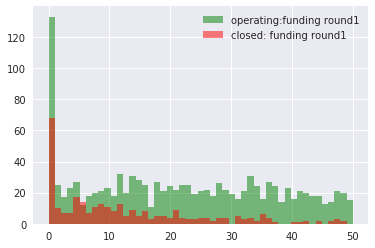

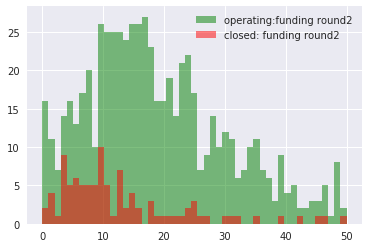

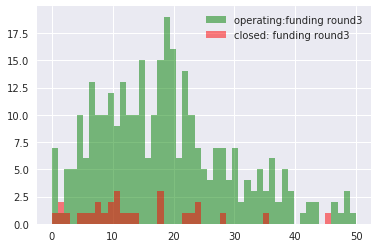

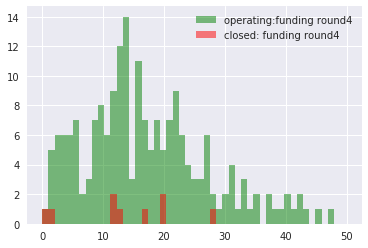

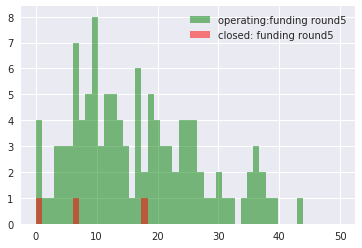

In [417]:
bins = np.linspace(0, 50, 50)
for i in range(5):
    plt.hist(rounds_operating[i], bins, alpha=0.5, label='operating:funding round'+str(i+1),color='green', normed=0)
    plt.hist(rounds_closed[i], bins, alpha=0.5, label='closed: funding round'+str(i+1), color='red',normed=0) 
    plt.legend(loc='upper right')
    plt.show()

__The green bars correspond to successful startups and red ones correspond to closed companies. This does not seem to be very helpful and kind of gives the same information that number of funding rounds gives so this is aso does nt give clear evidence__

## Thank You!